In [2]:
import openpyxl
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import seaborn as sns
import statistics
import numpy as np
import pandas as pd
from scipy.interpolate import interp1d

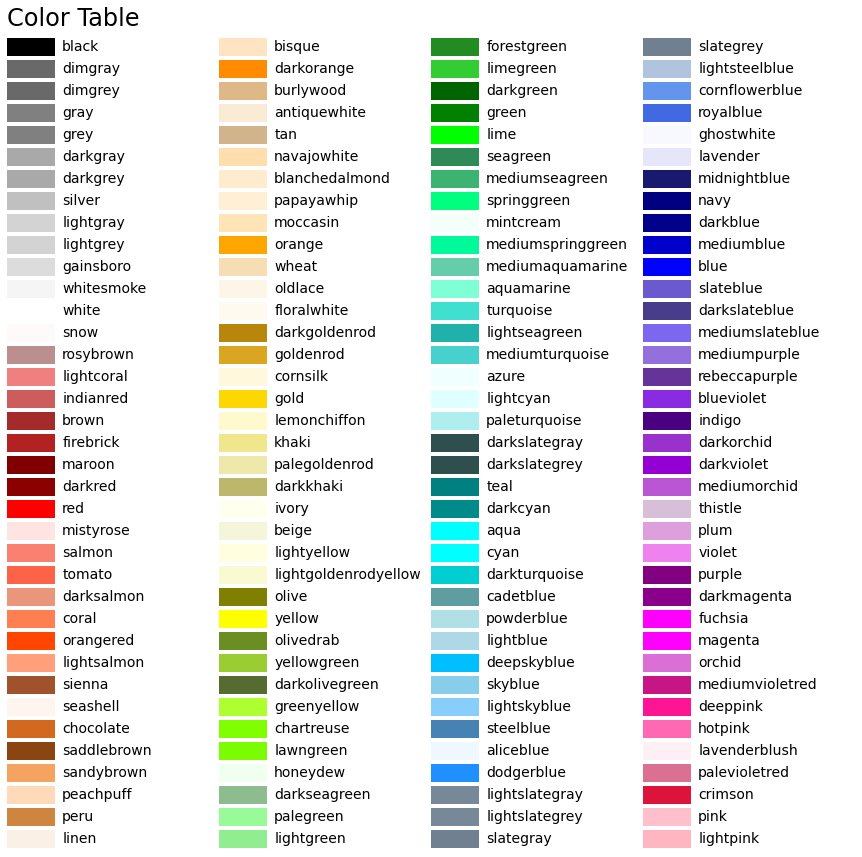

In [54]:
def plot_colortable(colors, title="Color Table", sort_colors=True, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 12
    topmargin = 40

    # Sort colors by hue, saturation, value and name.
    if sort_colors is True:
        by_hsv = sorted((tuple(mcolors.rgb_to_hsv(mcolors.to_rgb(color))),
                         name)
                        for name, color in colors.items())
        names = [name for hsv, name in by_hsv]
    else:
        names = list(colors)

    n = len(names)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(names):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        swatch_end_x = cell_width * col + swatch_width
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.hlines(y, swatch_start_x, swatch_end_x,
                  color=colors[name], linewidth=18)

    return fig

# Plot color table
plot_colortable(mcolors.CSS4_COLORS)
plt.show()

**Import**

In [4]:
def read_numeric_column_values(file_path, sheet_name, column):
    numeric_values = []
    try:
        workbook = openpyxl.load_workbook(file_path, data_only=True)
        sheet = workbook[sheet_name]
        column_values = sheet[column]
        for cell in column_values:
            if cell.value is not None:
                try:
                    numeric_value = float(cell.value)
                    numeric_values.append(numeric_value)
                except ValueError:
                    continue  # Skip non-numeric values and continue to the next iteration
    except FileNotFoundError:
        print("File not found. Please check the file path.")
    except KeyError:
        print("Sheet not found. Please check the sheet name.")
    except Exception as e:
        print("An error occurred:", e)
    finally:
        if 'workbook' in locals():
            workbook.close()
    return numeric_values


In [56]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "J"
DMSO = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", column_values)

Column values: [92.7, 146.775, 100.425, 95.78999999999999, 81.1125, 100.425, 83.42999999999999, 97.85000000000001, 88.8375, 135.95999999999998, 88.8375, 89.61, 77.25, 84.975, 103.0, 83.42999999999999, 95.78999999999999, 103.0, 84.975, 83.42999999999999, 96.5625, 98.88, 98.88, 86.52000000000001]


In [129]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "U"
#change to xlabel
pnBb_25 = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", pnBb_25)

file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002"
column = "AE"
#change to xlabel
pnBb_50 = read_numeric_column_values(file_path, sheet_name, column)
print("Column values:", pnBb_50)

Column values: [133.9, 108.14999999999999, 113.3, 162.225, 88.8375, 100.425, 87.55, 100.425, 118.45, 146.775, 90.49285714285715, 96.5625, 113.3, 80.34, 90.125, 133.9, 108.14999999999999, 128.75, 97.85000000000001, 96.5625, 97.85000000000001, 97.85000000000001, 92.7, 88.8375, 83.42999999999999, 105.05999999999999, 113.3, 92.7, 123.60000000000001, 84.975, 123.60000000000001, 115.875, 100.425, 97.85000000000001, 103.0]
Column values: [149.35, 139.05, 113.3, 162.225, 115.875, 101.97, 113.3, 118.45, 104.2875, 87.55, 113.3, 118.45, 103.0, 113.3, 96.5625, 113.3, 100.425, 87.55, 92.7, 108.14999999999999, 81.1125, 96.5625, 123.6, 92.7, 92.7, 123.6, 92.7, 118.45, 96.5625, 92.7]


**Bar Plot**

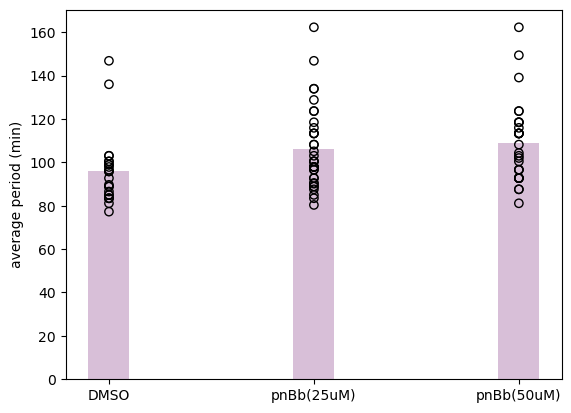

In [131]:
# Plotting the bar graph with slimmer bars and empty circles for dots
bar1 = plt.bar("DMSO", statistics.mean(DMSO), color='thistle', align='center', width = 0.2)  # Bar representing the average of column1 values
bar2 = plt.bar("pnBb(25uM)", statistics.mean(pnBb_25), color='thistle', align='center', width = 0.2)  # Bar representing the average of column2 values
bar3 = plt.bar("pnBb(50uM)", statistics.mean(pnBb_50), color='thistle', align='center', width = 0.2)  # Bar representing the average of column2 values

plt.ylabel('average period (min)')

        
# Overlaying dots for columns using scatter plot with empty circles
plt.scatter([0.0] * len(DMSO), DMSO, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column1 values with empty circles

plt.scatter([1.0] * len(pnBb_25), pnBb_25, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

plt.scatter([2.0] * len(pnBb_50), pnBb_50, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

plt.show()

**Violin Plot**

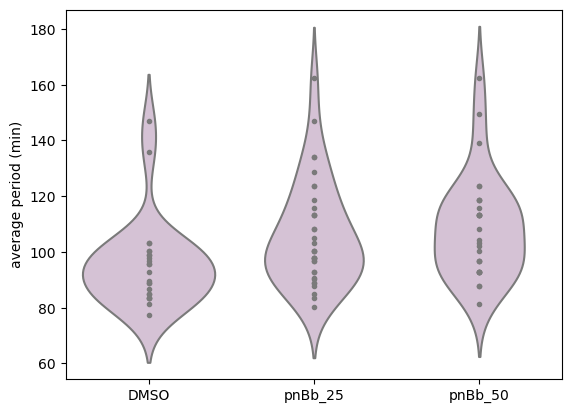

In [133]:
sns.violinplot(data=[DMSO, pnBb_25, pnBb_50], color="thistle", inner="point")
# palette="muted"
# inner="point" / inner="quart" / leaving inner empty gives a bar with whiskers

plt.xticks(ticks=[0, 1, 2], labels=["DMSO", "pnBb_25", "pnBb_50"])

plt.ylabel('average period (min)')

# Save the plot as a PNG file
# plt.savefig("bleb002-average-period.png")

plt.show()

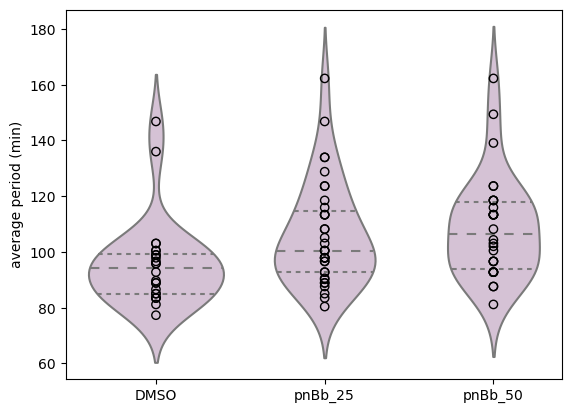

In [137]:
sns.violinplot(data=[DMSO, pnBb_25, pnBb_50], color="thistle", inner="quart")
# palette="muted"
# inner="point" / inner="quart" / leaving inner empty gives a bar with whiskers

plt.xticks(ticks=[0, 1, 2], labels=["DMSO", "pnBb_25", "pnBb_50"])

plt.ylabel('average period (min)')

plt.scatter([0.0] * len(DMSO), DMSO, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column1 values with empty circles
plt.scatter([1.0] * len(pnBb_25), pnBb_25, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles
plt.scatter([2.0] * len(pnBb_50), pnBb_50, zorder=2, facecolors='none', edgecolors='black')  # Scatter plot for column2 values with empty circles

# Save the plot as a PNG file
plt.savefig("bleb002-average-period.png")

plt.show()

**XY Plot**

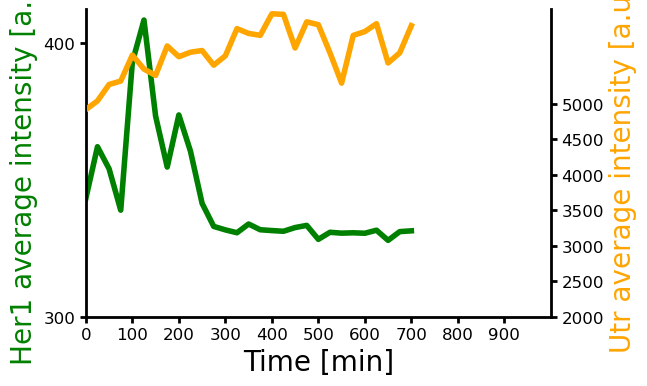

In [248]:
#plotting intensities from a square ROI

file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb001_intensities"
tr = 25 #time resolution, actually 25.6 mins

her1 = read_numeric_column_values(file_path, sheet_name, column = "AQ")
utrophin = read_numeric_column_values(file_path, sheet_name, column = "AR")

fig,ax = plt.subplots(figsize=[6,4])
ax.plot(her1, color='green',linewidth=4)
ax.set_ylabel("Her1 average intensity [a.u.]", fontsize = 20, color = "green")
ax.tick_params(labelsize=12)
ax.set_xticks(np.arange(0,40,4))
ax.set_xticklabels(np.arange(0,40,4)*tr)
ax.set_yticks(np.arange(300,500,100))
ax.set_xlim([0,40])

# To make a secondary Y-axis
ax2 = ax.twinx()
ax2.plot(utrophin, color='orange', linewidth=4)
ax2.set_ylabel('Utr average intensity [a.u.]', color='orange', fontsize = 20)
ax2.tick_params(width=2, length=4, labelsize = 12)
ax2.set_yticks(np.arange(2000,5500,500))

ax.set_xlabel('Time [min]', fontsize = 20)
ax.tick_params(width=2, length=4)
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)

plt.savefig("bleb001-xy170.png", bbox_inches='tight', facecolor = 'white')

plt.show()




**Plot from a dataframe**

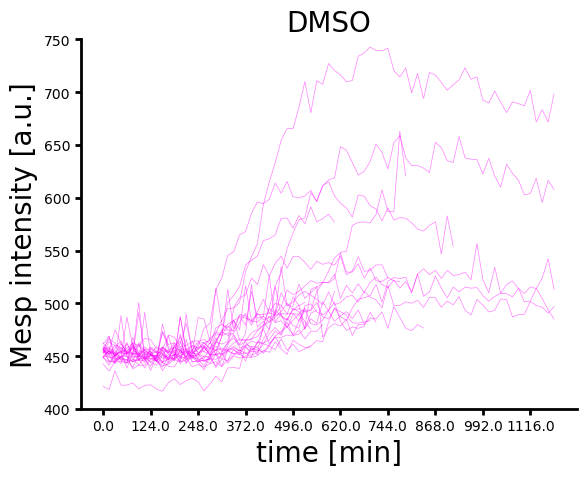

In [306]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well1_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('DMSO', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-dmso.png", bbox_inches='tight', facecolor = 'white')
plt.show()

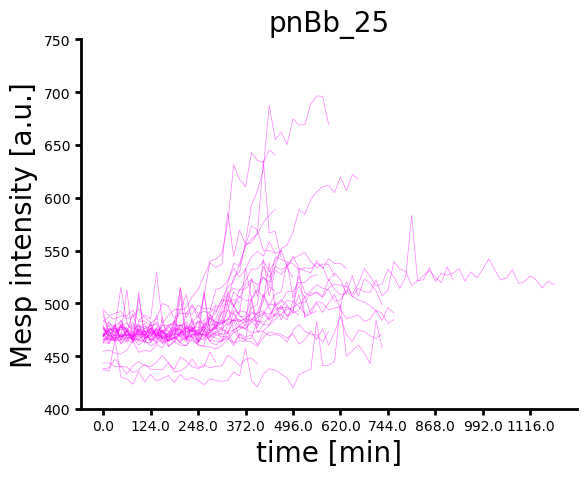

In [307]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well2_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('pnBb_25', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-pnbb25.png", bbox_inches='tight', facecolor = 'white')
plt.show()

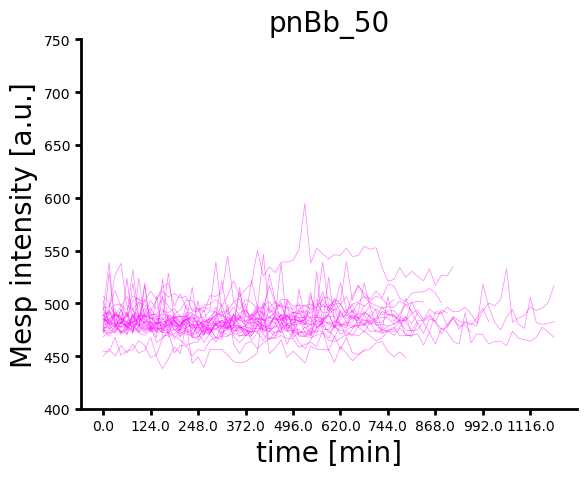

In [432]:
file_path = "/Users/fnarslan/Documents/single cell cultures/single-cell-cultures-quantification.xlsx"
sheet_name = "bleb002_well3_mesp"
intensities_mesp = pd.read_excel(file_path, sheet_name=sheet_name)

tr = 15.5 #time resolution
fig, ax = plt.subplots()

# Extract every second column
columns_to_plot = intensities_mesp.iloc[:, 1::2]  # Selects every second column starting from index 1

# Plot each column
for column in columns_to_plot.columns:
    plt.plot(intensities_mesp.index, columns_to_plot[column], label=column, color = 'magenta', linewidth=0.5, alpha=0.5)

plt.title('pnBb_50', fontsize=20)


ax.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax.spines['right'].set_linewidth(0)
#ax.set_xticklabels(np.arange(0,80,8))


ax.set_xticks(np.arange(0,80,8))
ax.tick_params(width=2, length=4)
ax.set_xticklabels(np.arange(0,80,8)*tr)
ax.set_ylim([400,750])

plt.xlabel('time [min]', fontsize=20)
plt.ylabel('Mesp intensity [a.u.]', fontsize=20)

plt.savefig("bleb002-mesp-pnbb50.png", bbox_inches='tight', facecolor = 'white')
plt.show()

**Normalize length of line plot and smooth**

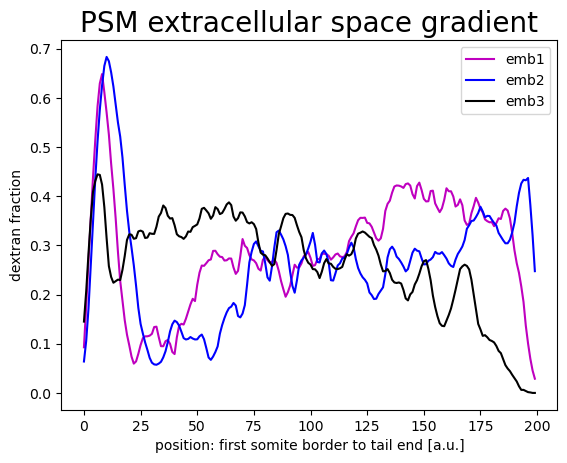

In [437]:
file_path = "/Users/fnarslan/Documents/in vivo quantification/dextran-quantification.xlsx"
#embryo 1
original_array = read_numeric_column_values(file_path, sheet_name = "231025", column = "L")
original_array = np.array(original_array)
#embryo 2
original_array2 = read_numeric_column_values(file_path, sheet_name = "231109", column = "L")
original_array2 = np.array(original_array2)
# embryo 3
original_array3 = read_numeric_column_values(file_path, sheet_name = "240131", column = "L")
original_array3 = np.array(original_array3)


# Define desired size for the array
desired_size = 200

# Generate indices for the original array
indices = np.arange(len(original_array))
indices2 = np.arange(len(original_array2))
indices3 = np.arange(len(original_array3))

# Create interpolation function
interpolated_function = interp1d(indices, original_array, kind='linear')
interpolated_function2 = interp1d(indices2, original_array2, kind='linear')
interpolated_function3 = interp1d(indices3, original_array3, kind='linear')


# Generate new indices
new_indices = np.linspace(0, len(original_array) - 1, desired_size)
new_indices2 = np.linspace(0, len(original_array2) - 1, desired_size)
new_indices3 = np.linspace(0, len(original_array3) - 1, desired_size)

# Interpolate missing values for new indices
resized_array = interpolated_function(new_indices)
resized_array2 = interpolated_function(new_indices2)
resized_array3 = interpolated_function(new_indices3)

# Interpolate values for new indices
interpolated_values = interpolated_function(new_indices)
interpolated_values2 = interpolated_function(new_indices2)
interpolated_values3 = interpolated_function3(new_indices3)

# Apply moving average smoothing
window_size = 8
smoothed_array = np.convolve(interpolated_values, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(interpolated_values2, np.ones(window_size) / window_size, mode='same')
smoothed_array3 = np.convolve(interpolated_values3, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'm-', label='emb1')
plt.plot(smoothed_array2, 'b-', label='emb2')
plt.plot(smoothed_array3, 'k-', label='emb3')

plt.xlabel('position: first somite border to tail end [a.u.]')
plt.ylabel('dextran fraction')
plt.legend()
plt.title("PSM extracellular space gradient", fontsize = 20)



plt.savefig("PSM-dextran.png", bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()


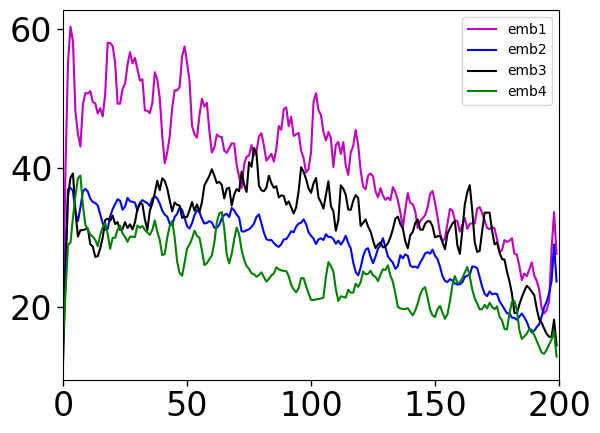

In [35]:
file_path = "/Users/fnarslan/Documents/in_vivo/2D_intensity_profiles/phalloidin/line_profiles.xlsx"
#embryo 1
original_array = read_numeric_column_values(file_path, sheet_name = 'mid-PSM',column = "D")
original_array = np.array(original_array[::-1])
#embryo 2
original_array2 = read_numeric_column_values(file_path,sheet_name = 'mid-PSM', column = "I")
original_array2 = np.array(original_array2[::-1])
# embryo 3
original_array3 = read_numeric_column_values(file_path,sheet_name = 'mid-PSM', column = "N")
original_array3 = np.array(original_array3[::-1])
# emrbyo 4
original_array4 = read_numeric_column_values(file_path, sheet_name = 'mid-PSM',column = "S")
original_array4 = np.array(original_array4[::-1])


# Define desired size for the array
desired_size = 200

# Generate indices for the original array
indices = np.arange(len(original_array))
indices2 = np.arange(len(original_array2))
indices3 = np.arange(len(original_array3))
indices4 = np.arange(len(original_array4))

# Create interpolation function
interpolated_function = interp1d(indices, original_array, kind='linear')
interpolated_function2 = interp1d(indices2, original_array2, kind='linear')
interpolated_function3 = interp1d(indices3, original_array3, kind='linear')
interpolated_function4 = interp1d(indices4, original_array4, kind='linear')


# Generate new indices
new_indices = np.linspace(0, len(original_array) - 1, desired_size)
new_indices2 = np.linspace(0, len(original_array2) - 1, desired_size)
new_indices3 = np.linspace(0, len(original_array3) - 1, desired_size)
new_indices4 = np.linspace(0, len(original_array4) - 1, desired_size)

# Interpolate missing values for new indices
resized_array = interpolated_function(new_indices)
resized_array2 = interpolated_function(new_indices2)
resized_array3 = interpolated_function(new_indices3)
resized_array4 = interpolated_function(new_indices4)

# Interpolate values for new indices
interpolated_values = interpolated_function(new_indices)
interpolated_values2 = interpolated_function2(new_indices2)
interpolated_values3 = interpolated_function3(new_indices3)
interpolated_values4 = interpolated_function4(new_indices4)

# Apply moving average smoothing
window_size = 4
smoothed_array = np.convolve(interpolated_values, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(interpolated_values2, np.ones(window_size) / window_size, mode='same')
smoothed_array3 = np.convolve(interpolated_values3, np.ones(window_size) / window_size, mode='same')
smoothed_array4 = np.convolve(interpolated_values4, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'm-', label='emb1')
plt.plot(smoothed_array2, 'b-', label='emb2')
plt.plot(smoothed_array3, 'k-', label='emb3')
plt.plot(smoothed_array4, 'g-', label='emb4')

plt.xlim([0,200])
ax.tick_params(width=1, length=4, labelsize = 24)

#plt.xlabel('position: first somite border to tail end [a.u.]')
#plt.ylabel('phalloidin average intensity')
plt.legend()



plt.savefig('/Users/fnarslan/Documents/in_vivo/2D_intensity_profiles/phalloidin/240902-2.svg', bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()


array([1.        , 2.00709935, 2.75599389, 3.01155453, 2.90681722,
       2.40020029, 2.24342531, 2.15191331, 2.45315401, 2.53587923,
       2.53233875, 2.5499399 , 2.47136457, 2.46286943, 2.38898783,
       2.42664481, 2.3686689 , 2.53092039, 2.89728923, 2.89435464,
       2.87402487, 2.75502769, 2.45974191, 2.45973286, 2.5650196 ,
       2.60406801, 2.73781303, 2.82952355, 2.74924166, 2.78880719,
       2.70690156, 2.62510995, 2.6348012 , 2.41119433, 2.40947499,
       2.39228008, 2.46420161, 2.68539363, 2.63341444, 2.50079549,
       2.2299043 , 2.03303499, 2.10827151, 2.22484194, 2.42618594,
       2.55675682, 2.55444901, 2.57964285, 2.79890499, 2.87042297,
       2.75309823, 2.62267381, 2.30044735, 2.23895015, 2.21637002,
       2.37771973, 2.49427339, 2.43933079, 2.46547445, 2.26469923,
       2.10889985, 2.14569796, 2.23833202, 2.22345439, 2.22063039,
       2.12243699, 2.10704176, 2.13972546, 2.17486414, 2.17371045,
       2.01954004, 1.93839475, 1.8541702 , 2.02248458, 2.07908

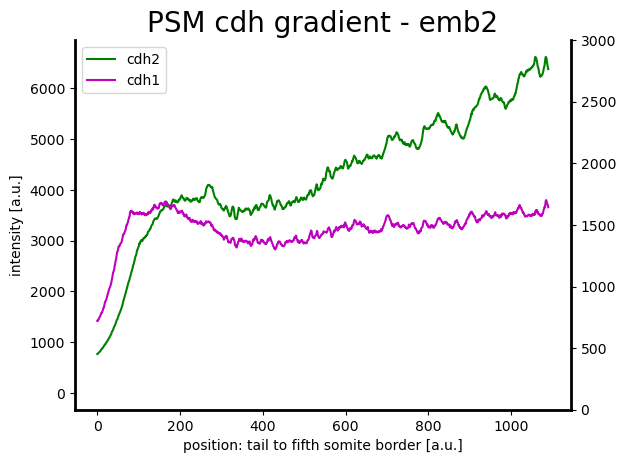

In [454]:
file_path = "/Users/fnarslan/Documents/in vivo quantification/cdh2-cdh1.xlsx"
#embryo 1-cdh2
original_array = read_numeric_column_values(file_path, sheet_name = 'Sheet1', column = "L")
original_array = np.array(original_array)
#embryo 1-cdh1
original_array2 = read_numeric_column_values(file_path, sheet_name = 'Sheet1', column = "O")
original_array2 = np.array(original_array2)


# Apply moving average smoothing
window_size = 1
smoothed_array = np.convolve(original_array, np.ones(window_size) / window_size, mode='same')
smoothed_array2 = np.convolve(original_array2, np.ones(window_size) / window_size, mode='same')

fig, ax = plt.subplots()
# Plot original and smoothed resized arrays
#plt.plot(indices2, original_array2, 'bo-', label='Original')
plt.plot(smoothed_array, 'g-', label='cdh2')
plt.plot(0, 'm-', label='cdh1')


plt.xlabel('position: tail to fifth somite border [a.u.]')
plt.ylabel('intensity [a.u.]')
plt.legend()
plt.title("PSM cdh gradient - emb2", fontsize = 20)

# To make a secondary Y-axis
ax2 = ax.twinx()
ax2.plot(smoothed_array2, 'm-', label='cdh1')
ax2.set_ylim([0,3000])

    
ax.spines['top'].set_linewidth(0)
ax2.spines['top'].set_linewidth(0)
ax.spines['bottom'].set_linewidth(2)
ax.spines['left'].set_linewidth(2)
ax2.spines['right'].set_linewidth(2)


plt.savefig("PSM-cdh-emb2.png", bbox_inches='tight', facecolor = 'white', dpi = 300)
plt.show()

In [ ]:
import imagej
import numpy as np
from skimage.draw import polygon_perimeter
import matplotlib.pyplot as plt

# Start an ImageJ gateway
ij = imagej.init()

# Open your image in ImageJ and manually create ROIs
# Assuming you have already done this and stored the ROI manager in a variable named 'rm'

# Get the ROIs from the ROI manager
231222-cdh2-pos4-psm-mid_rois = ij.roi()
rois = rm.getRoisAsArray()

# Initialize label image
label_image = np.zeros((512, 512), dtype=np.uint8)

# Iterate over each ROI
for i, roi in enumerate(rois):
    # Get coordinates of the ROI polygon
    x = roi.getContainedPointsX()
    y = roi.getContainedPointsY()

    # Fill the ROI in the label image with the ROI number
    rr, cc = polygon_perimeter(y, x)
    label_image[rr, cc] = i + 1

# Display the label image
plt.imshow(label_image, cmap='jet')
plt.colorbar()
plt.title('Label Image (Color-coded by ROI)')
plt.show()
